<a href="https://colab.research.google.com/github/alexandergribenchenko/Data_Science_Toolkit/blob/main/Geospatial/01_factored_geospatial_ws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Geospatial Workshop 101**
<div align='center'>
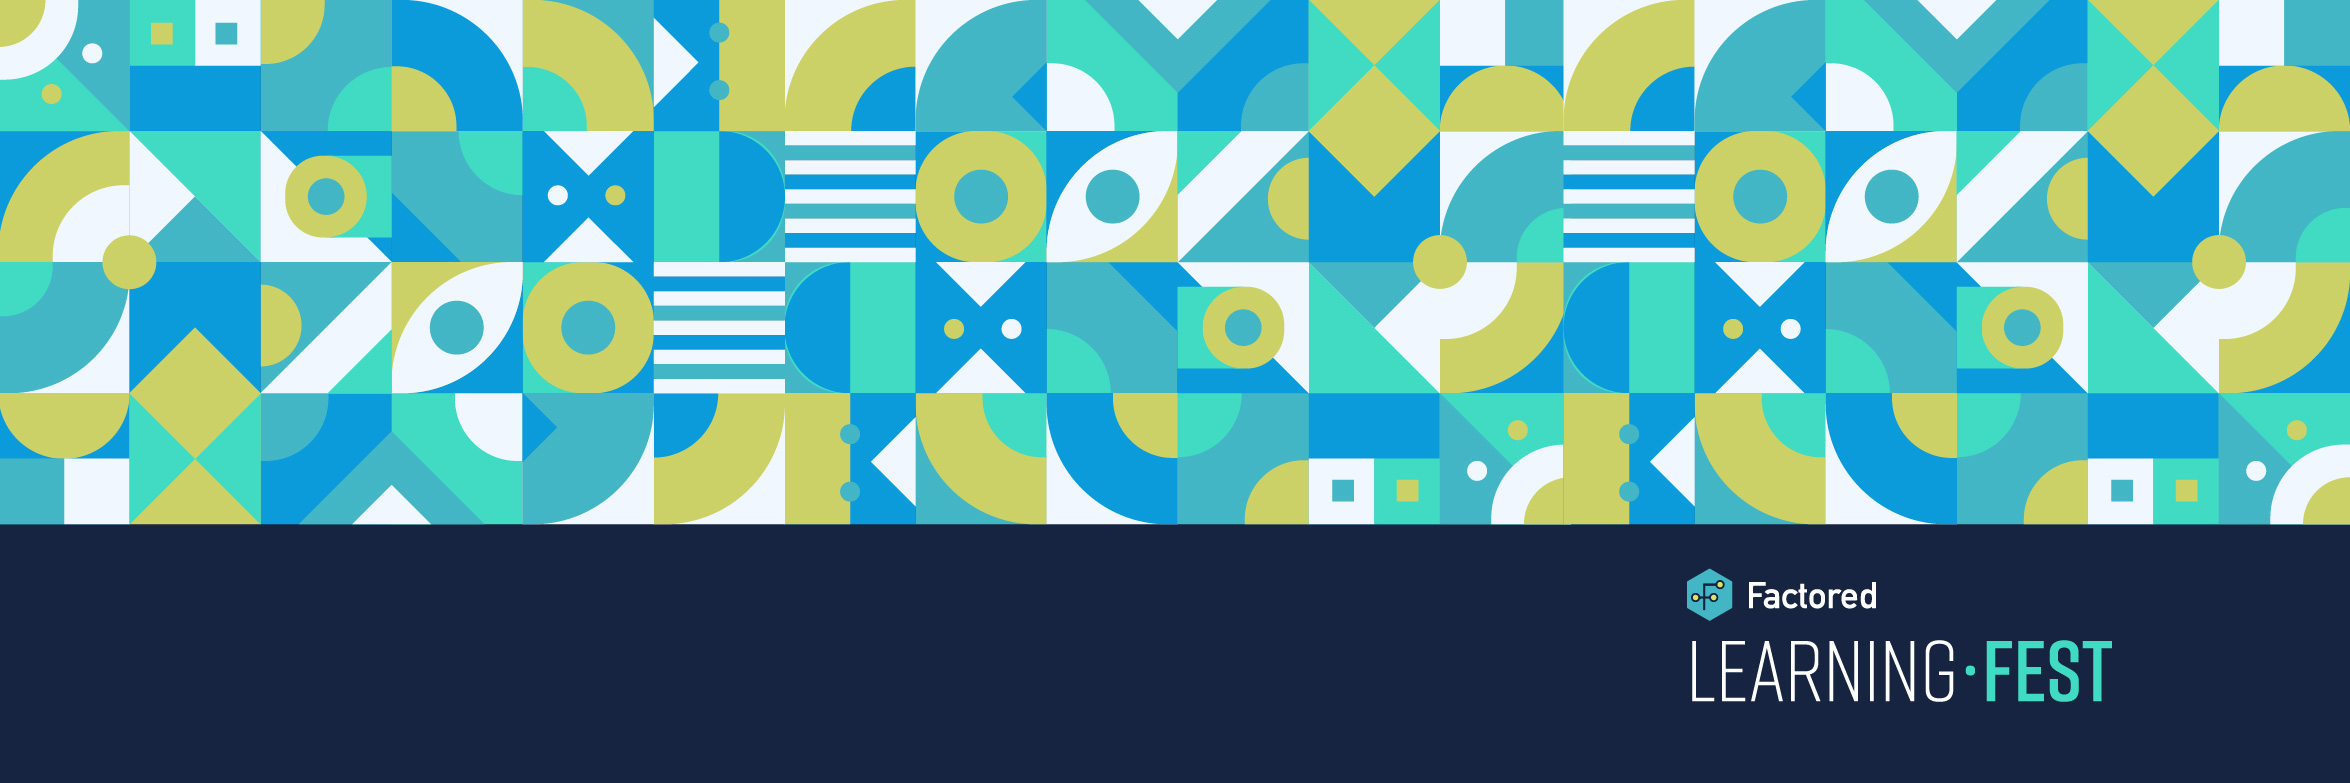
</div>



### Objectives

* Set you up very quickly on the essentials of Geospatial Analysis
* Build a foundation to deal with Geospatial data using Python
* Use vector data
* Broad understanding and use of Geospatial Operations
* Introduction to mapping and cartography

In [ ]:
!pip install contextily
!pip install folium
!pip install geopandas
!pip install mapclassify
!pip install pandas
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import contextily as cx
import folium
import geopandas as gpd
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import mapclassify
import numpy as np
import os
import pandas as pd
import shapely

from shapely.geometry import Point, MultiPoint, LineString, MultiLineString, Polygon, MultiPolygon


## Simple Features

As you may remember, Simple Features are the Data Model for storing geospatial data. In this section we will explore a little bit how does simple features look in practice when working in Python anda basic interactive visualization
<div align='center'>
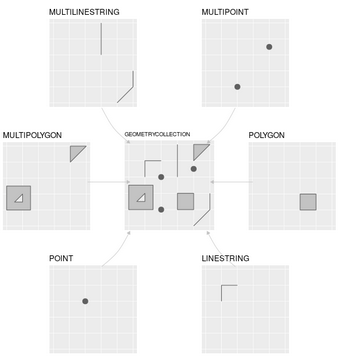
</div>


In [ ]:
# What's a Simple Feature (Point, Line Polygon)
latitude = 4.6944346
longitude = -74.0322957
point = Point(latitude, longitude)

In [ ]:
latitude

4.6944346

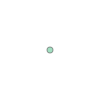

In [ ]:
point

In [ ]:
multipoint = MultiPoint(
    [[-74.03404475694639, 4.689772660543127],
     [-74.03437465993484, 4.688750525413042],
     [-74.03476160632201, 4.687400243801818],
     [-74.03491938601228, 4.686292331265392],
     [-74.03530666343381, 4.684962833903555],
     [-74.03580269488477, 4.684147728529581],
     [-74.03637010206344, 4.682915201181473],
     [-74.0368647647321, 4.6817261727408805]])

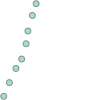

In [ ]:
multipoint

In [ ]:
multilinestring = MultiLineString(
    [[[ -74.05011499499338, 4.698649032393874],
      [-74.04318262330436, 4.696694948064021],
      [-74.03691547920204, 4.694775752768152],
      [-74.03435960479142, 4.694252334953262]
     ], 
     [[-74.03516488029109, 4.693065919785184],
      [-74.04087183274156, 4.689227503957355],
      [-74.04626367738872, 4.686191651043899],
      [-74.04769916849571, 4.685423962011981],
      [-74.04724401277873, 4.688250449285903],
      [-74.04605360551896, 4.6904139256471495]
     ]])

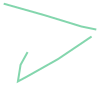

In [ ]:
multilinestring

In [ ]:
polygon = Polygon([[-74.1223648759206, 4.692942878955165], [-74.16008669562513, 4.721007981699884],
                 [-74.16966030932542, 4.709890398501855], [-74.13615574052898, 4.683059601941196],
                 [-74.1322218864827, 4.688460574498677], [-74.14279137215902, 4.69633587334458],
                 [-74.1425243591362, 4.697267280681743], [-74.1412560472781, 4.69833174468728],
                 [-74.13885293007395, 4.696735048070835], [-74.12583604521603, 4.687088261623103],
                 [-74.12396695405688, 4.689017629574977], [-74.12483474638077, 4.689749457403451],
                 [-74.12396695405688, 4.690547814160951], [-74.12303240847703, 4.689682927632802],
                 [-74.12209786289776,4.6910800514922215], [-74.12283214871022, 4.69187840672835],
                 [-74.1223648759206,4.692942878955165]
                ])

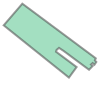

In [ ]:
polygon

In [ ]:
# Here we declare a Folium interactive object to which we should add the features
map = folium.Map(location=[latitude,longitude],zoom_start=15,tiles='cartodbpositron')

# Set some random format with HTML
html_format = ''' <center> <h1> WeWork Usaquén </h1> </center>'''
icon = folium.features.CustomIcon('https://pbs.twimg.com/profile_images/1187912056160210944/Mnr40tTU_400x400.jpg',icon_size=(30,30)) 

# Set up the pop up (The window that appears when you click the feature)
popup = folium.Popup(html=folium.IFrame(html=html_format,width='500px',height='380px'), max_width=1000,parse_html=True)

# Let's add a point to an interactive map
folium.Marker([latitude,longitude], popup=popup, icon=icon).add_to(map)

# Now our multipoint
folium.GeoJson(multipoint).add_to(map)

# How about the multilinestring
folium.GeoJson(multilinestring).add_to(map)

# And lastly the polygon
folium.GeoJson(polygon).add_to(map)

# This is to show the map
map


## Maps are flat, but Earth is not (CRS)

So, we're going to explore some of the visual effects of Projections in our data
<div align='center'>
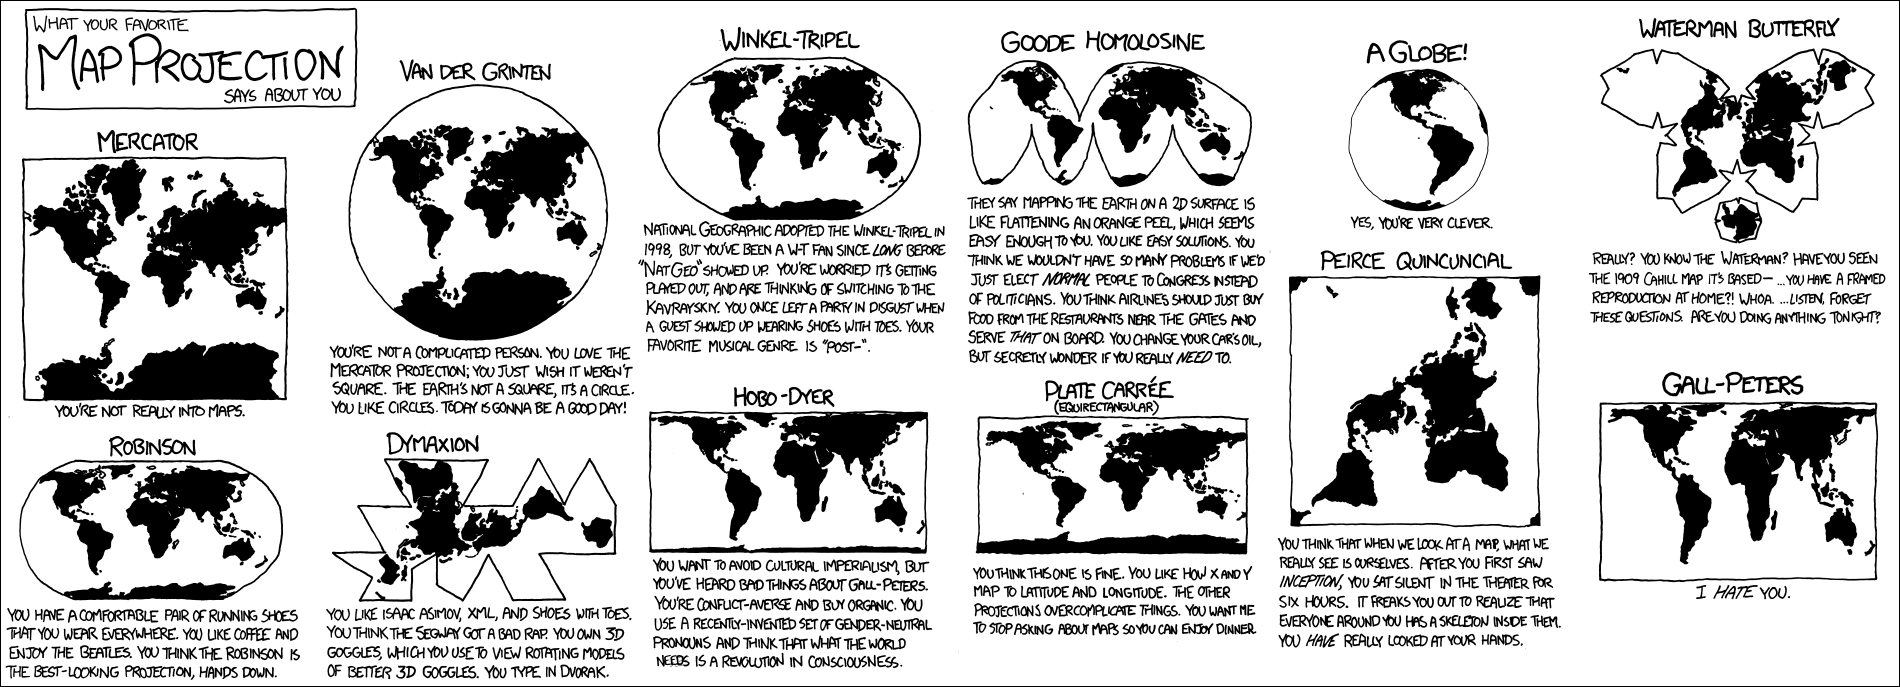
</div>

#### Geographic CRS

World Geodetic System 84 EPSG:4326 - > Used in all GPS systems and one of the most common Projection Systems
It's 3D, which doesn't mean it cannot be represented in a plane, but you must bear in mind that calculations will be done over a Sphere or Spheroid 

#### Projected version

Web Mercator or Pseudo Mercator - EPSG:3857 -> For Flat - ie Google Maps, Carto, Bing, Osm.
The projected version will have Meters as units, Geographic versions Degrees

**EPSG**: European Petroleum Survey Group is an organization that provides codes to identify specific coordinate reference systems (CRSs) used in geospatial data.\
An **EPSG code** is a unique identifier assigned by the EPSG to a specific CRS.\
In https://epsg.io you can look for the specifications of different CRS worldwide.

In [ ]:
# GeoPandas library comes with some data which we can load
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
# Let's check the CRS
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

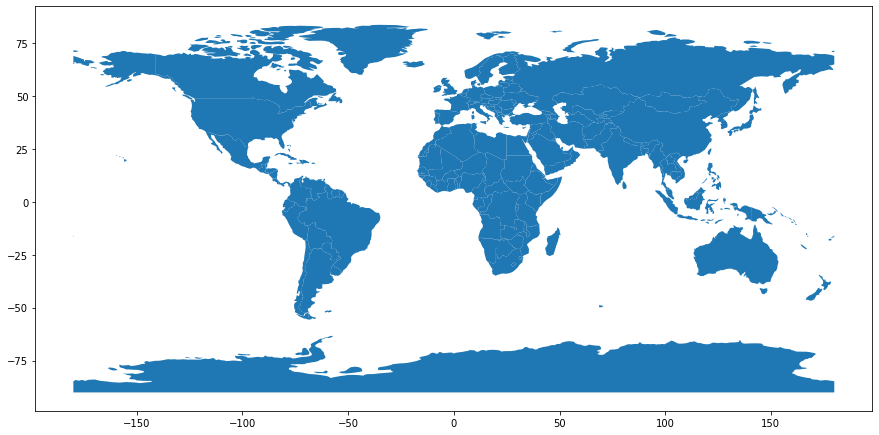

In [ ]:
# Now let's plot it
world.plot(figsize=(15, 15))

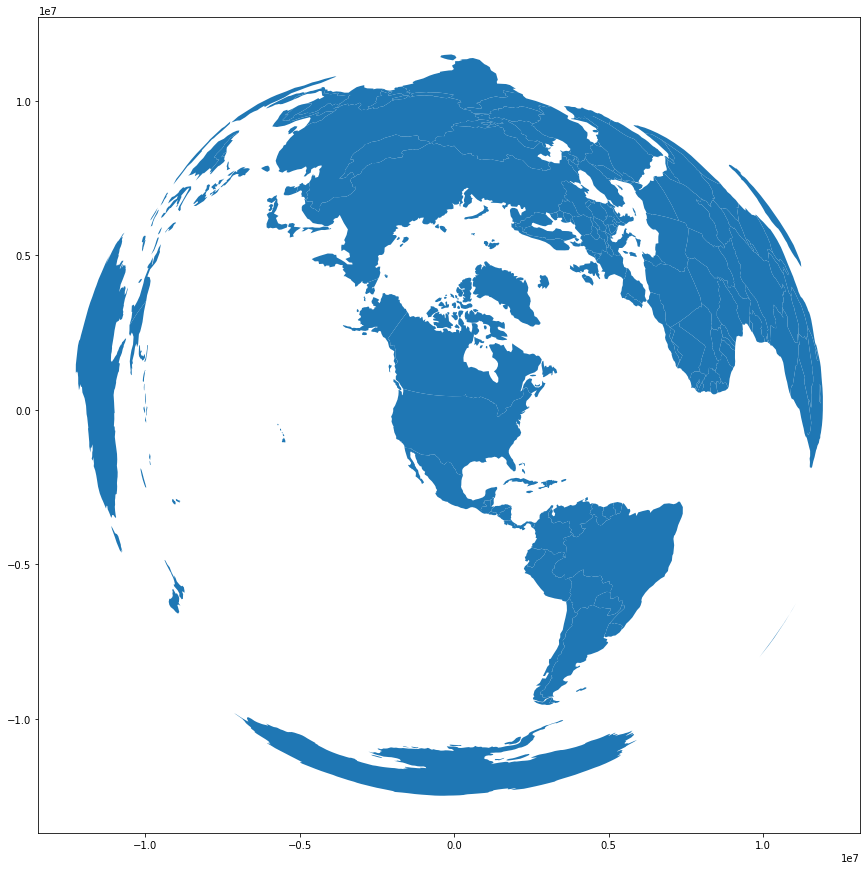

In [ ]:
# What happen if we reproject it to a totally different projections
#world.to_crs(3857).plot(figsize=(15, 15)) #EPSG:3857 - Web Mercator

# Try some
# EPSG:2382 - China
# EPSG:5070 - USA
# EPSG:3116 - Colombia
# "ESRI:54034" Equal Area Provided by ESRI
# EPSG:9311 - USA Equal Area
world.to_crs(9311).plot(figsize=(15, 15)) 
# EPSG:29192 - South America

### Takeaways
* Sometimes you need to reproject your data to fit the analysis you're doing
* Make sure the units on your map are appropriate (meters, feet, degrees)
* Sometimes the data you have doesn't have the CRS assigned so you should do research and assign it yourself

## **The fun part**

1. Data Formats
2. Subsetting data
3. Spatial Operations
4. Reprojections
5. Mapping

So far we've worked with data we set up locally (Part 1) or data available on our library (Part 2)\
Now we should explore loading data from Colombia, more specific from Bogota and doing some analysis.

For this the data comes from Census and Open Street Map

* OpenStreetMap (OSM) is a collaborative, open-source map of the world that is created by volunteers. The map data is collected and maintained by users from all over the world and is freely available for anyone to use. (https://download.geofabrik.de/index.html)
* Census data is provided by DANE, Colombia's national statistics department

From OSM we will get a layer called Points of Interest (pois)\
From Dane we will download National Municipalities and Urban Sectors (A small urban subdivision with Census Data)

In [ ]:
# Let's load the data
# Points of Interest
pois = gpd.read_file("/content/osm_colombia_pois.zip")

# Colombia municipalities
mpios = gpd.read_file("https://www.dane.gov.co/files/geoportal-provisional/SHP_MGN2018_INTGRD_MPIO.zip")

# Colombian Urban Sectors
urb_sec_bogota = gpd.read_file("/content/sec_urban_bogota.geojson")

In [ ]:
# Good practice, always check the CRS of the data you're using
print(pois.crs)
print(mpios.crs)
print(urb_sec_bogota.crs)

EPSG:4326
EPSG:4686
EPSG:4686


In [ ]:
# So, it seems that we should reproject some of our layers, to keep it simple we should use WGS84
mpios_wgs = mpios.to_crs(4326)
urb_sec_bogota_wgs = urb_sec_bogota.to_crs(4326)

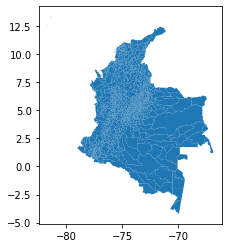

In [ ]:
# Let's plot a nice colombia map! 
mpios_wgs.plot()

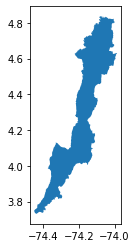

In [ ]:
# Let's get the data for Bogota
bogota = mpios_wgs.loc[mpios_wgs['MPIO_CDPMP']=='11001']
bogota.plot()

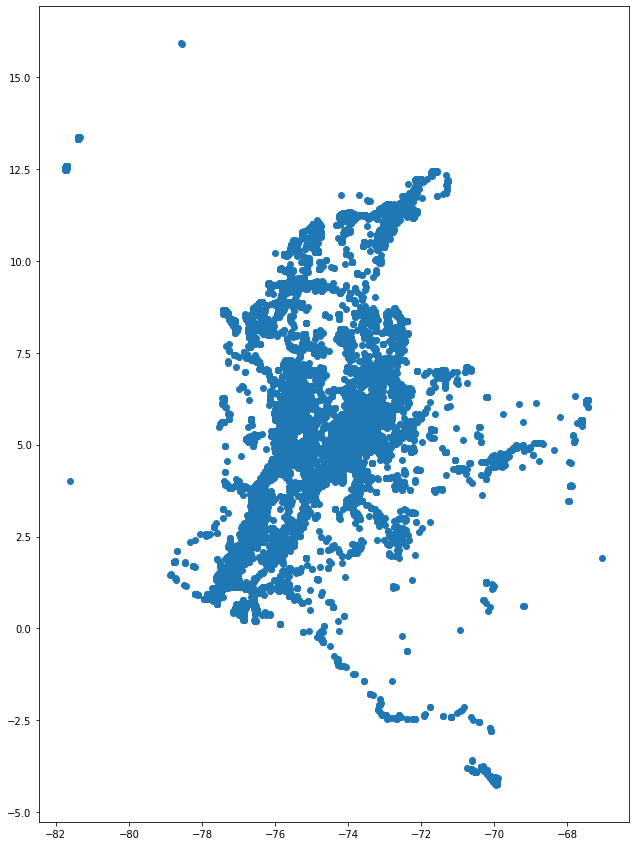

In [ ]:
# Now plot it
pois.plot(figsize=(15,15))

In [ ]:
pois.head()

,osm_id,code,fclass,name,geometry
0,249418926,2082,school,Rafael Rodríguez,POINT (-76.84639 0.23556)
1,249418933,2082,school,Rita Lecumberry,POINT (-76.88694 0.23139)
2,253846055,2301,restaurant,Casa de Piedra,POINT (-74.00290 4.66412)
3,255471144,2904,fountain,NaN,POINT (-74.09378 4.65385)
4,261139202,2541,car_dealership,Renault,POINT (-74.04865 4.68421)


### The task!
Geospatial analysis can be used with different applications that can impact yours and others lifes!\
For example, I love having some beers with my friends and lucky for me in the **pois** data OSM includes **bar, restaurant, biergarten and pub** categories. With that information I want to figure out Bogotá areas with the highest concentrations of these places to be able to visi... for research purposes.

We’re only interested in analyzing Bogotá se we need to filter the data \
But as you can see in the **pois** table we don't have any code to filter Bogotá... That's when Geospatial power comes in…
<div align='left'>
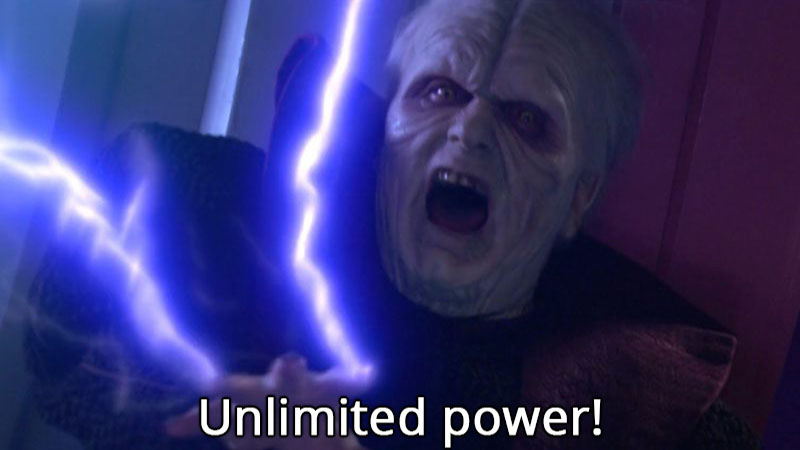
</div>

In [ ]:
# We will use the sjoin function (Spatial Join)
pois_bogota = pois.sjoin(bogota, how="inner", predicate='intersects')
pois_bogota.head()

,osm_id,code,fclass,name,geometry,index_right,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CDPMP,...,STP34_8_ED,STP34_9_ED,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area
3,255471144,2904,fountain,NaN,POINT (-74.09378 4.65385),908,11,001,"BOGOTÃ, D.C.",11001,...,270715.0,138673.0,1443711.0,2682119.0,1953893.0,416430.0,111390.0,161781.0,3.760453,0.132208
4,261139202,2541,car_dealership,Renault,POINT (-74.04865 4.68421),908,11,001,"BOGOTÃ, D.C.",11001,...,270715.0,138673.0,1443711.0,2682119.0,1953893.0,416430.0,111390.0,161781.0,3.760453,0.132208
5,261664692,2528,greengrocer,NaN,POINT (-74.12024 4.67478),908,11,001,"BOGOTÃ, D.C.",11001,...,270715.0,138673.0,1443711.0,2682119.0,1953893.0,416430.0,111390.0,161781.0,3.760453,0.132208
6,262567789,2301,restaurant,La Casa de la Abuela,POINT (-74.06669 4.61375),908,11,001,"BOGOTÃ, D.C.",11001,...,270715.0,138673.0,1443711.0,2682119.0,1953893.0,416430.0,111390.0,161781.0,3.760453,0.132208
7,264785624,2301,restaurant,Vegetariano Vega,POINT (-74.06349 4.64560),908,11,001,"BOGOTÃ, D.C.",11001,...,270715.0,138673.0,1443711.0,2682119.0,1953893.0,416430.0,111390.0,161781.0,3.760453,0.132208


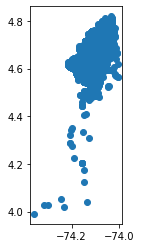

In [ ]:
pois_bogota.plot()

In [ ]:
# Now we should clean up our dataset a little bit (96 Columns!)
pois_bogota = pois_bogota[['osm_id', 'code', 'fclass','name', 'geometry', 'DPTO_CCDGO', 'MPIO_CCDGO', 'MPIO_CNMBR', 'MPIO_CDPMP']]

# And now let's check posible places to have a drink
pois_bogota['fclass'].unique()

array(['fountain', 'car_dealership', 'greengrocer', 'restaurant', 'cafe',
       'supermarket', 'museum', 'school', 'town_hall', 'bank', 'atm',
       'hotel', 'hospital', 'viewpoint', 'college', 'clinic',
       'tourist_info', 'sports_centre', 'department_store', 'hostel',
       'bookshop', 'playground', 'police', 'fast_food', 'pharmacy',
       'convenience', 'monument', 'bar', 'motel', 'laundry', 'cinema',
       'pub', 'bakery', 'mall', 'attraction', 'post_office',
       'furniture_shop', 'beverages', 'hairdresser', 'clothes',
       'optician', 'toy_shop', 'shoe_shop', 'toilet', 'library', 'prison',
       'doctors', 'community_centre', 'theatre', 'university',
       'veterinary', 'chemist', 'bicycle_shop', 'telephone',
       'outdoor_shop', 'arts_centre', 'doityourself', 'embassy',
       'courthouse', 'market_place', 'butcher', 'memorial', 'car_wash',
       'water_tower', 'bench', 'computer_shop', 'food_court',
       'water_works', 'picnic_site', 'florist', 'camera_survei

In [ ]:
# So we can filter now the categories we want 
pois_bogota = pois_bogota.loc[pois_bogota['fclass'].isin(['bar','pub','beverages', 'biergarten', 'restaurant'])]
pois_bogota

,osm_id,code,fclass,name,geometry,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CDPMP
6,262567789,2301,restaurant,La Casa de la Abuela,POINT (-74.06669 4.61375),11,001,"BOGOTÃ, D.C.",11001
7,264785624,2301,restaurant,Vegetariano Vega,POINT (-74.06349 4.64560),11,001,"BOGOTÃ, D.C.",11001
8,264785679,2301,restaurant,Vegetariano Ajonjoli,POINT (-74.06368 4.64556),11,001,"BOGOTÃ, D.C.",11001
9,265024916,2301,restaurant,Desayunadero De La 42,POINT (-74.05889 4.65349),11,001,"BOGOTÃ, D.C.",11001
10,265024917,2301,restaurant,Vegetartiano Novilunio,POINT (-74.05823 4.65442),11,001,"BOGOTÃ, D.C.",11001
...,...,...,...,...,...,...,...,...,...
83693,10575838041,2307,biergarten,Bruder,POINT (-74.05641 4.64903),11,001,"BOGOTÃ, D.C.",11001
83702,10577400641,2301,restaurant,EL PANTERA,POINT (-74.06222 4.64109),11,001,"BOGOTÃ, D.C.",11001
83703,10577673341,2307,biergarten,BBC Bogotá Beer Company,POINT (-74.05976 4.64340),11,001,"BOGOTÃ, D.C.",11001
83704,10577673441,2307,biergarten,Cervecería Statua Rota,POINT (-74.05965 4.64331),11,001,"BOGOTÃ, D.C.",11001


In [ ]:
# But right now we only have points, but the target is aggregating the data to the Urban Sectors
# So let's leverage again the sjoin funtion
urb_sect_pois_join = gpd.sjoin(urb_sec_bogota, pois_bogota) #Spatial join Points to polygons
urb_sect_agg = pd.pivot_table(urb_sect_pois_join, index='COD_SECC', columns='DPTO_CCDGO', aggfunc={'osm_id':"count"})
urb_sect_agg.columns = urb_sect_agg.columns.droplevel()
urb_sect_agg = urb_sect_agg.rename(columns={'11':'bars_restaurants'})

urb_sec_polygons = urb_sec_bogota.merge(urb_sect_agg, how='left', on='COD_SECC')

<ipython-input-70-740cf26c134c>:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4686
Right CRS: EPSG:4326

  urb_sect_pois_join = gpd.sjoin(urb_sec_bogota, pois_bogota) #Spatial join Points to polygons


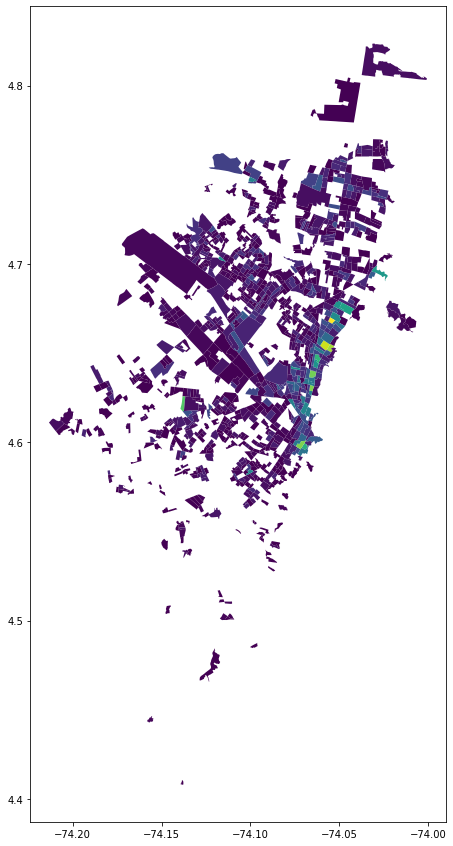

In [ ]:
# Take a look to your beautiful results
urb_sec_polygons.plot(column='bars_restaurants', figsize=(15,15))

## Let's give it some love!
You can customize the look of your map as much as you want. 
1. We can change the color scheme to suit your preferences. https://colorbrewer2.org/ its a beautiful tool to choose color palettes for your maps
2. Also add a legend, a reference for viewers for your categories. Try not to use more than 5-6 categories
3. The distribution of your data matters, changing this can have a huge impact 

<div align='center'>
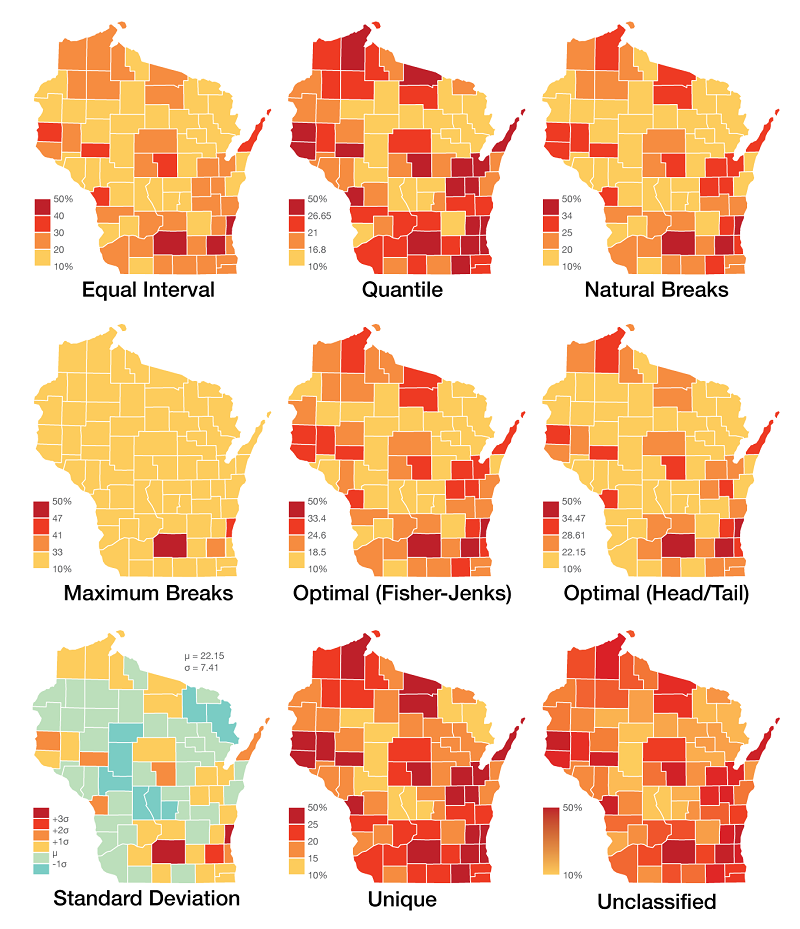
</div>

4. Add additional layers for context
5. Add a basemap

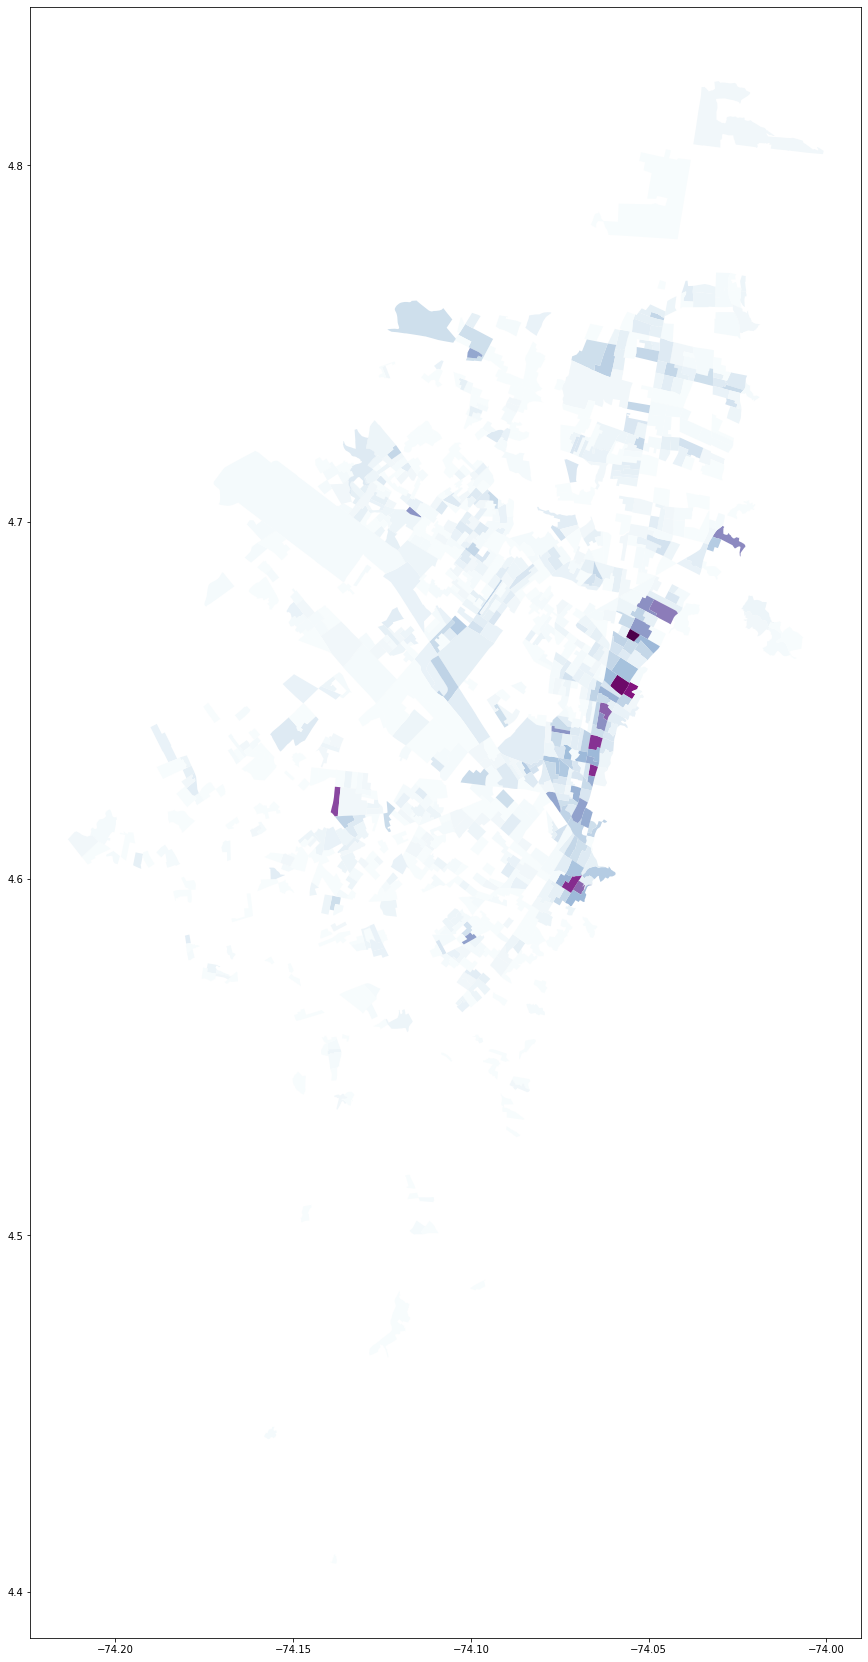

In [ ]:
# First we can explore color schemes (And maby make a biger map)
urb_sec_polygons.plot(column='bars_restaurants', figsize=(30,30), cmap='BuPu')

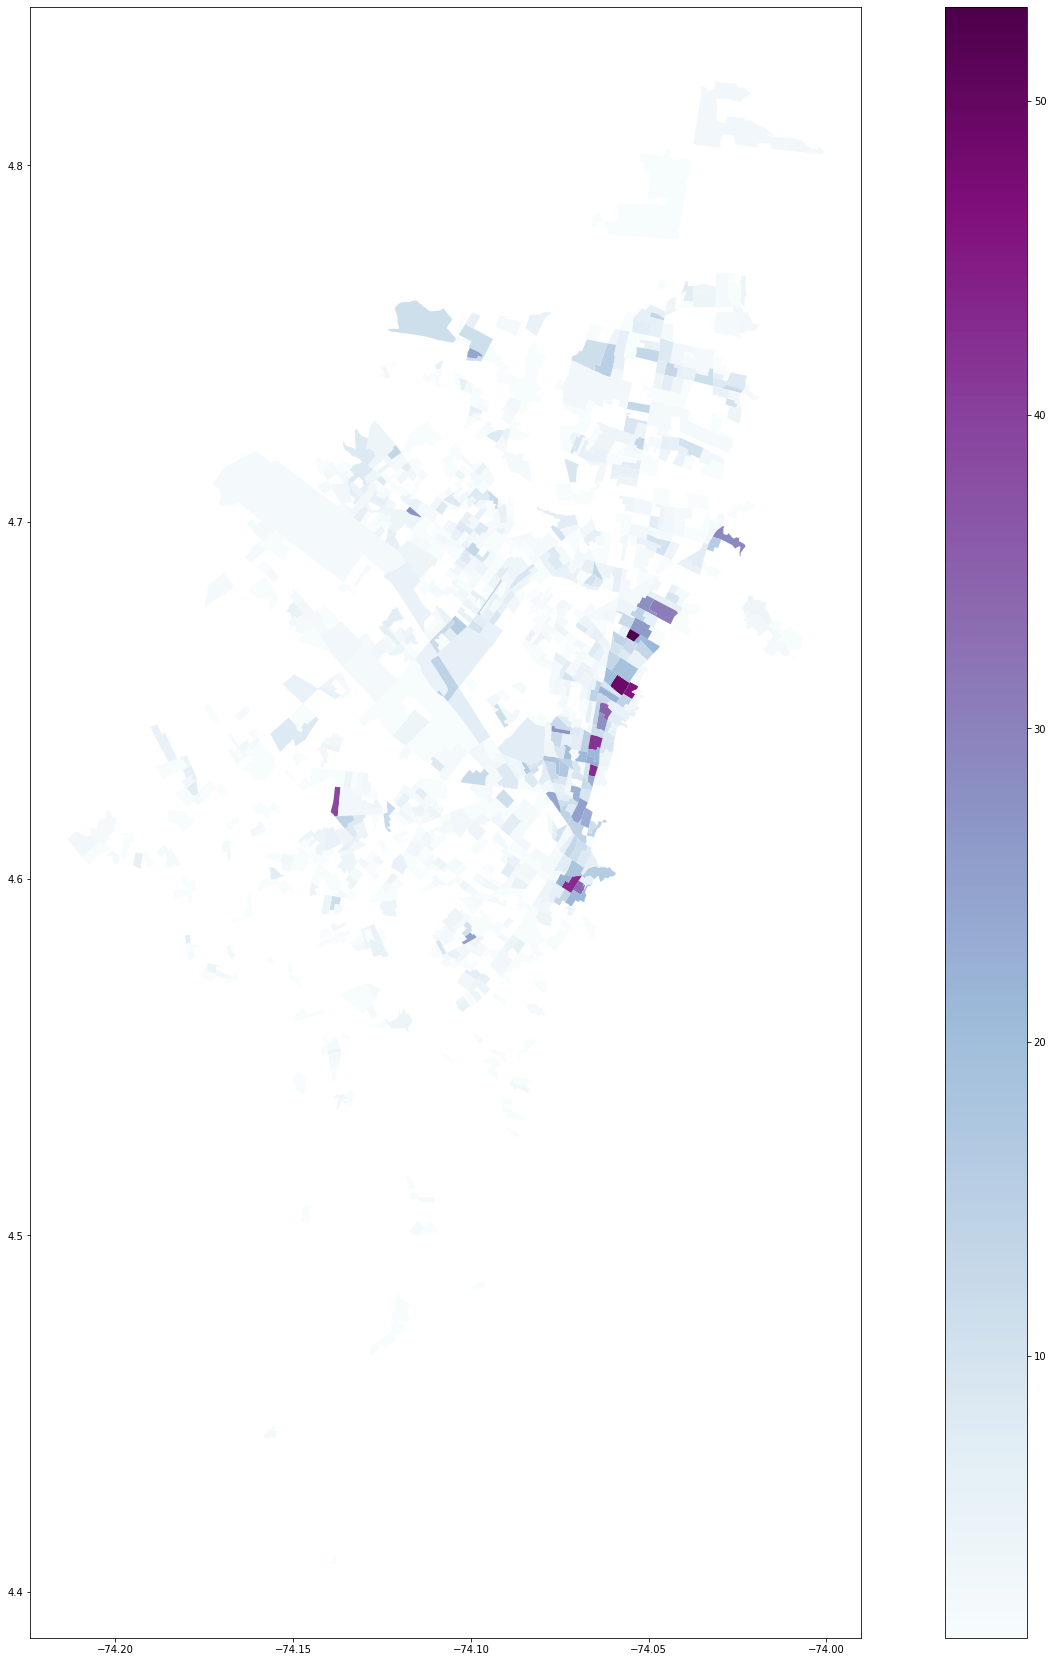

In [ ]:
# Ok, but how do I know what those color mean
urb_sec_polygons.plot(column='bars_restaurants', figsize=(30,30), cmap='BuPu', legend=True)

In [ ]:
# But with so many colors its difficult to distinguish
urb_sec_polygons.plot(column='bars_restaurants', scheme='natural_breaks', figsize=(30,30), k=5, cmap='BuPu', legend=True)

In [ ]:
# Let's add some borders
urb_sec_polygons.plot(column='bars_restaurants', scheme='natural_breaks', figsize=(30,30), k=5, cmap='BuPu', edgecolor='k', legend=True)

In [ ]:
# Or remove them whatever you feel like
urb_sec_polygons.plot(column='bars_restaurants', scheme='natural_breaks', figsize=(30,30), k=5, cmap='BuPu', edgecolor='face', legend=True)

In [ ]:
# Let's load some Localidades
localidad = gpd.read_file("https://datosabiertos.bogota.gov.co/dataset/856cb657-8ca3-4ee8-857f-37211173b1f8/resource/30916322-7509-4cb4-8241-6be2b5109248/download/loca.zip")

# You remember the Web Mercator projection? well, to add a basemap our data should be in that projection
urb_sec_polygons_3857 = urb_sec_polygons.to_crs(3857)
localidad_3857 = localidad.to_crs(3857)

In [ ]:
fig = plt.figure(figsize = (50, 50), tight_layout = True) 
base = fig.add_subplot() #192048
urb_sec_polygons_3857.plot(ax=base, column='bars_restaurants', scheme='natural_breaks', figsize=(50,50), k=5, cmap='BuPu', edgecolor='face', legend=True)
localidad_3857.boundary.plot(ax=base, color='black') #0d1024
cx.add_basemap(base, zoom=12, source=cx.providers.CartoDB.Positron)

In [ ]:
# This part creates the map
fig = plt.figure(figsize = (50, 50), tight_layout = True) 
base = fig.add_subplot() #192048
urb_sec_polygons_3857.plot(ax=base, column='bars_restaurants', scheme='natural_breaks', figsize=(50,50), k=5, cmap='OrRd', edgecolor='face', legend=True)
localidad_3857.boundary.plot(ax=base, color='black') #0d1024
cx.add_basemap(base, zoom=12, source=cx.providers.CartoDB.Positron)

# All of this is for labels (Python can make you suffer)
bounds = localidad_3857.total_bounds
aspect = (bounds[2] - bounds[0]) / (bounds[3] - bounds[1])
box = shapely.geometry.box(*bounds)

for idx, row in localidad_3857.set_index('LocNombre').iterrows():
    centroid = row.geometry.intersection(box).representative_point()
    t = base.text(centroid.x, centroid.y, idx, 
                           horizontalalignment='center', 
                           fontsize=8, 
                           fontweight='bold', 
                           color='white')
    t.set_path_effects([path_effects.Stroke(linewidth=2, 
                                            foreground='black'), 
                        path_effects.Normal()])